In [4]:
import pandas as pd
from binance.client import Client
import datetime as dt
import ta
import numpy as np
import peakutils

#Client configuration
api_key = 'RKg96HAG4XLHFfAmyispxSZMekKdxExc3x24DQEFuIxQsJg9GiVRyrf9oOvY0MWa'
api_secret = 'q1p1mmwxl7Q3QNZ1L5osIZ5evIRyeckkoDBterCQTKwO0hDfscUAls9N8NuQ0KWp'
client = Client(api_key, api_secret)

symbol = "BTCUSDT"
interval='15m'

#contantes definidas Client.KLINE_INTERVAL_15MINUTE (por exemplo, isto é = str('15m'))

klines = client.get_historical_klines(symbol, interval, "3 Jan,2022")

data = pd.DataFrame(klines)

#Define what column is what
data.columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol', 'taker_quote_vol', 'ignore']

#Set the dates of each row (as the start of each candle)
data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.open_time]

data=data.astype(float)

#Useless columns to apply the strategy
data.drop('open_time', inplace=True, axis=1)
data.drop('ignore', inplace=True, axis=1)
data.drop('num_trades', inplace=True, axis=1)
data.drop('close_time', inplace=True, axis=1)
data.drop('taker_quote_vol', inplace=True, axis=1)
data.drop('taker_base_vol', inplace=True, axis=1)
data.drop('qav', inplace=True, axis=1)


# Strategy implementation


#Here we calculate the indicators value and place them inside our dataframe
def setIndicators(df, interval):
    #Fast Stochastic Oscillator
    df['%K'] = ta.momentum.stoch(df.high,df.low,df.close, window=14, smooth_window=3)
    #Slow Stochastic Oscillator (smoothed)
    df['%D'] = df['%K'].rolling(3).mean()
    #RSI
    df['rsi'] = ta.momentum.rsi(df.close, window=14)
    #MACD
    df['macd'] = ta.trend.macd_diff(df.close)
    #KAMA is a adaptive moving average that accounts for market noise or volatility
    df['KAMA'] = ta.momentum.kama(df.close, window=14)
    return df

#Here we analize the previous created indicators
def analizeIndicators(df):
    return df


#We define here what indicators need to be true to make a buy or a sell
def strategy(df):
    return df

data = setIndicators(data, interval)

data.dropna(inplace=True) #Remove lines with Null/NaN values (first 14 days)

#Get all RSI peaks to analyze divergence RSI
indices = peakutils.indexes(-data['rsi'], thres=0.75, min_dist=0.1)
tmp = []
for idx, _ in enumerate(data.index):
    if idx in indices:
        tmp.append(True)
    else:
        tmp.append(False)

data['rsi_peak'] = tmp






    


In [5]:
from scipy.signal import argrelextrema
from collections import deque
def getHigherHighs(data: np.array, order=5, K=2):
  '''
  Finds consecutive higher highs in price pattern.
  Must not be exceeded within the number of periods indicated by the width 
  parameter for the value to be confirmed.
  K determines how many consecutive highs need to be higher.
  '''
  # Get highs
  high_idx = argrelextrema(data, np.greater, order=order)[0]
  highs = data[high_idx]
  # Ensure consecutive highs are higher than previous highs
  extrema = []
  ex_deque = deque(maxlen=K)
  for i, idx in enumerate(high_idx):
    if i == 0:
      ex_deque.append(idx)
      continue
    if highs[i] < highs[i-1]:
      ex_deque.clear()
    
    ex_deque.append(idx)
    if len(ex_deque) == K:
      extrema.append(ex_deque.copy())
  
  return extrema

SyntaxError: invalid syntax (3808804260.py, line 21)

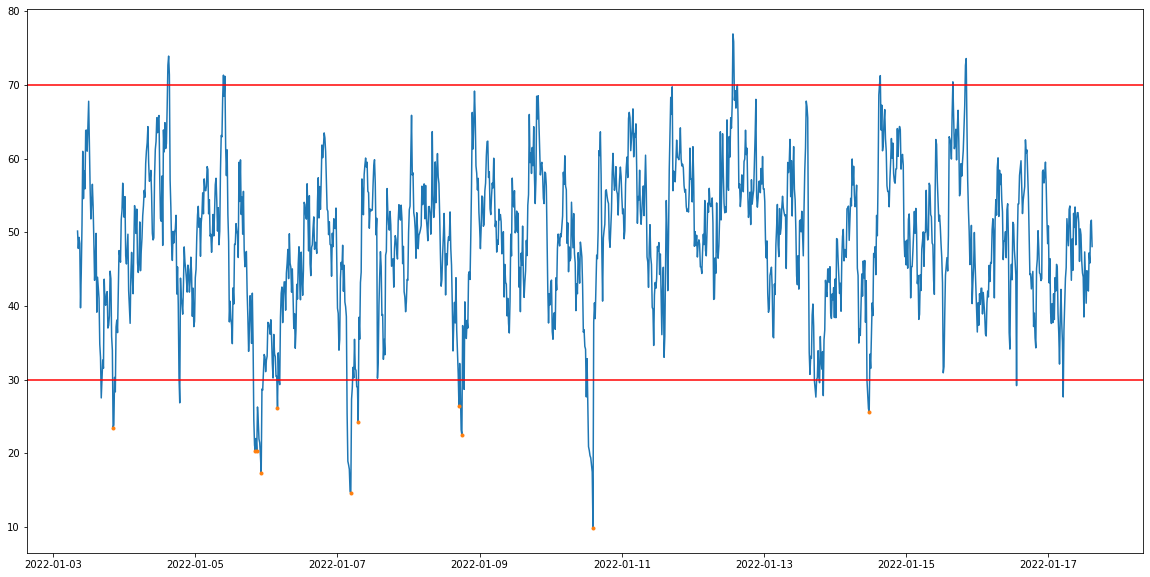

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(data.index, data['rsi'])
plt.plot(data.index[indices], data['rsi'][indices], marker="o", ls="", ms=3 )
plt.axhline(y = 30, color = 'r', linestyle = '-')
plt.axhline(y = 70, color = 'r', linestyle = '-')
plt.show()

In [ ]:
import cufflinks as cf
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
# to get the connection
init_notebook_mode(connected = True)
  
# plotly also serves online,
# but we are using just a sample
cf.go_offline()

# creating dataframes

qf = cf.QuantFig(data, title="Random Title")
qf.add_sma(periods=14, column='close', color='blue')
qf.add_rsi(periods=14, color='green')
qf.add_macd()
qf.iplot()


ModuleNotFoundError: No module named 'plotly.graph_objects'